##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Classifying Images of Clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Aşağıdaki komut tenserflow kütüphanesini son sürümüne yükseltmemizi sağlar.

In [3]:
pip install -U tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf

Aşağıda kullandığımız kütüphaneleri açıklamamız gerekirse 
- TensorFlow görüntüler, metin, ses ve video dahil olmak üzere çeşitli veri kümelerine kolay ve verimli erişim sağlar. Eğitim ve değerlendirme için veri kümesi hazırlama ve biçimlendirme işlemlerini kolaylaştırır.
- tfds.disable_progress_bar(), veri kümelerini yüklerken gösterilen ilerleme çubuğunu devre dışı bırakır.
- NumPy bilimsel hesaplama için bir Python kütüphanesidir.Güçlü bir N-boyutlu dizi nesnesi sağlar. Dizilerle işlem yapmak için matematiksel işlemler, doğrusal cebir ve rastgele sayı üretimi de dahil olmak üzere geniş bir işlev yelpazesi sunar.
- Matplotlib statik, animasyonlu ve etkileşimli görselleştirmeler oluşturmak için bir Python kütüphanesidir. Çizgi grafikler, dağılım grafikleri, sütun grafikleri ve histogramlar dahil olmak üzere çeşitli çizim işlevleri sağlar.


In [ ]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Mert\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Burada ise "logger = tf.get_logger()" satırı tensorFlow logger nesnesini alır. Logger, TensorFlow kütüphaneleri ve modülleri tarafından oluşturulan iletileri kaydetmek için kullanılır.
- logger.setLevel(logging.ERROR) kısmı ise tensorFlow logger'ının loglama seviyesini ERROR olarak ayarlar. Bu, yalnızca ERROR veya daha yüksek bir ciddiyet seviyesine sahip iletilerin kaydedileceği anlamına gelir. Logging modülü DEBUG, INFO, WARNING, ERROR ve CRITICAL dahil olmak üzere birkaç loglama seviyesi tanımlar.
Loglama seviyesini ERROR olarak ayarlamak, yalnızca önemli hata iletilerinin kaydedilmesini sağlar.

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the [Datasets](https://www.tensorflow.org/datasets) API:

- Aşağıdaki ilk satır TensorFlow Veri Kümeleri'nden Fashion MNIST veri kümesini yükler. 
- İkinci satırda ise veri kümelerini antrenman ve test verisi olarak ikiye böler.

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

- Class_names kısmı, veri kümesi meta verisinden farklı sınıfların isimlerini çıkarır. Fashion MNIST veri kümesinde 10 farklı giyim eşyası sınıfı bulunmaktadır.
Sınıf isimleri, veri kümesi meta verisinin etiket özelliği altında saklanmaktadır.
Sınıf isimlerini çıkarmak, veri kümesindeki farklı giyim eşyalarını kolayca tanımlamanıza olanak tanır.
Bu bilgi, veriyi anlamak ve veri kümesinde eğitilen bir makine öğrenimi modelinin performansını değerlendirmek için kullanışlı olabilir. Devamında print satırında ise bu class isimlerini yazdırıyoruz.

In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


- Bu satırlar, veri kümesi meta verisinden eğitim ve test örneklerinin sayısını çıkarır.
- Fashion MNIST veri kümesi, 70,000 görüntüden oluşur ve bunlar 60,000 eğitim görüntüsü ve 10,000 test görüntüsüne ayrılmıştır.
Örnek sayısını çıkarmak, veri kümesinin boyutunu kolayca görmek ve verinin eğitim ve test arasındaki dağılımını anlamak için kullanışlıdır.

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Eğitim örneği sayısı: {}".format(num_train_examples))
print("Test örneği sayısı:   {}".format(num_test_examples))

Eğitim örneği sayısı: 60000
Test örneği sayısı:   10000


- Bu fonksiyon, bir görüntü ve etiketler kümesini girdi olarak alır ve görüntüleri normalize eder.
tf.cast(goruntuler, tf.float32): Bu, görüntüleri orijinal veri türlerinden (örneğin, uint8) kayan nokta değerlere dönüştürür.
goruntuler /= 255: Bu, her piksel değerini 255'e böler ve piksel değerlerini 0 ile 1 arasında bir aralığa normalize eder.
- Bu satırlar, map işlevini kullanarak normalize fonksiyonunu eğitim ve test veri kümelerindeki her öğeye uygular.Map işlevi bir veri kümesindeki öğelere dönüşümler uygulamak için güçlü bir araçtır.
Bu, normalizasyon, boyutlandırma ve veri artırma gibi çeşitli ön işleme adımlarını gerçekleştirmek için kullanılabilir.
 - train dataset ve test dataset kısmında ise hem eğitim hem de test veri kümelerinin öğelerini bellekte önbelleğe alır. Bu, özellikle veri kümeleri büyükse veya yavaş bir depolama cihazı kullanıyorsanız eğitim döngünüzün performansını artırabilir.Cache yöntemi ayrıca dağıtılmış eğitimin performansını artırmak için de kullanılabilir.

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

- For döngüsü, test veri kümesi üzerinde dolaşır ve sadece ilk öğeyi alır. break ifadesi, ilk öğeyi aldıktan sonra döngüden çıkar.
- Görüntü değişkeni başlangıçta üç boyuta sahiptir: yükseklik, genişlik ve renk kanalları. Bu satır, renk boyutunu kaldırarak görüntüyü iki boyutlu bir diziye yeniden şekillendirir.
- Plot kısmı TensorFlow veri kümesinden bir tek görüntü almayı, renk boyutunu kaldırmayı ve sonra görüntüyü çizmeyi sağlar.

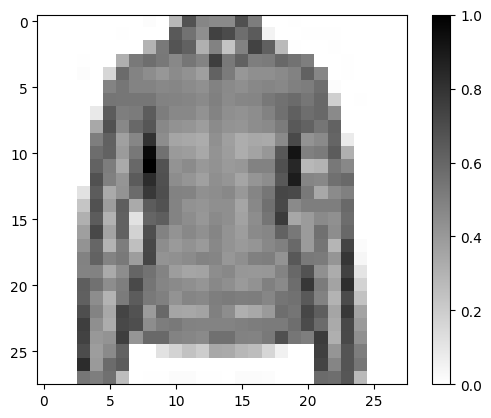

In [ ]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

- 10x10 inç boyutunda yeni bir figür nesnesi oluşturulur.
- Döngü, eğitim veri kümesinin ilk 25 öğesinde dolaşır. İ değişkeni döngüdeki mevcut dizini tutar. Görüntü değişkeni mevcut görüntüyü tutar.  Label mevcut classı tutar.
- İmage görüntüyü bir NumPy dizisine dönüştürür ve renk boyutunu kaldırarak iki boyutlu bir diziye yeniden şekillendirir devamında görüntü çizilir.

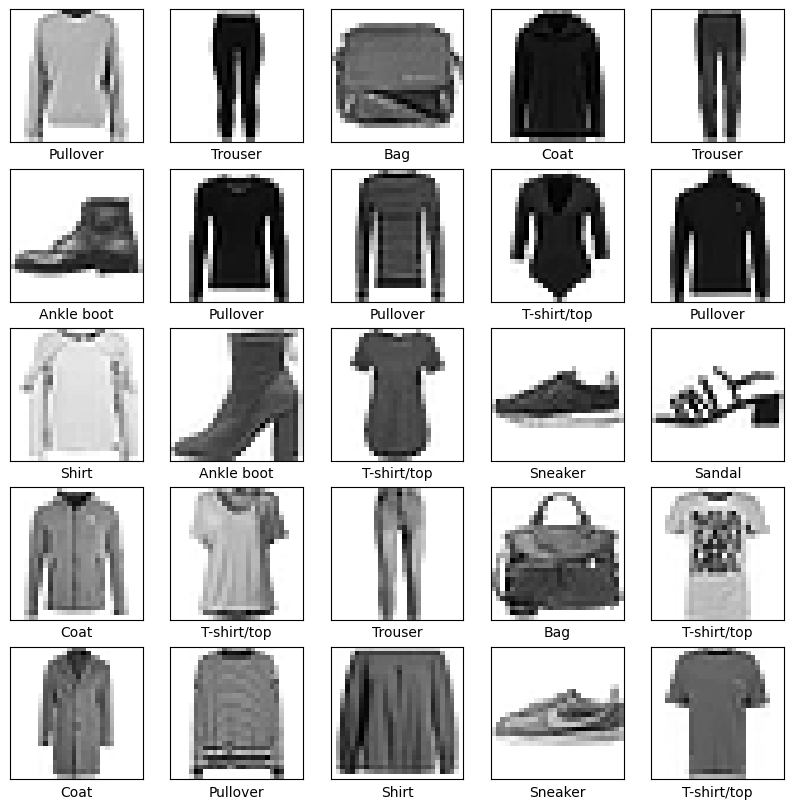

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

- Bu kod parçası, Fashion MNIST görüntülerini sınıflandırmak için bir TensorFlow Keras modeli tanımlar. Model üç katmandan oluşur:
Flatten katmanı: Bu katman, 2D girdi görüntüsünü (28x28 piksel) 1D bir vektöre dönüştürür. Bu, modeldeki sonraki katmanların 1D bir girdi beklemesi gerektiği için gereklidir.
128 birime sahip Dense katmanı: Bu katman, 128 gizli birime sahip tam bağlantılı bir katmandır. Girişe ReLU aktivasyon fonksiyonunu uygular.
10 birime sahip Dense katmanı:Bu katman da tam bağlantılı bir katmandır, ancak 10 birime sahiptir ve Fashion MNIST veri kümesindeki 10 giyim sınıfına karşılık gelir. Girişe softmax aktivasyon fonksiyonunu uygular, bu da 10 sınıf üzerinde bir olasılık dağılımı çıktısı verir.
Genel olarak, bu model Fashion MNIST görüntülerini sınıflandırmak için kullanılabilecek basit bir besleme ileri yapılı bir sinir ağıdır.



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

- Bu kısım, TensorFlow Keras modelini 'adam' adlı bir optimizer ile derler. Kayıp fonksiyonu olarak 'SparseCategoricalCrossentropy()' kullanır, bu da çok sınıflı sınıflandırma problemleri için uygundur. Modelin performansını 'accuracy' (doğruluk) metriği ile değerlendirir. Bu şekilde derlenen model, eğitim veri kümesi üzerinde eğitilebilir ve test veri kümesinde performansı değerlendirilebilir.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

- Egitim_veri_kumesi.cache(): Bu, eğitim veri kümesinin öğelerini bellekte önbelleğe alır. Bu, özellikle veri kümesi büyükse veya yavaş bir depolama cihazı kullanıyorsanız eğitim döngünüzün performansını artırabilir.
egitim_veri_kumesi.repeat(): Bu, eğitim veri kümesini sürekli olarak tekrarlar. Bu, modelin birden çok epoch için eğitileceği için gereklidir.
egitim_veri_kumesi.shuffle(num_train_examples): Bu, eğitim veri kümesinin öğelerini karıştırır. Bu, modelin çeşitli örneklerden öğrenmesini ve eğitim verilerine aşırı uymasını engellemeye yardımcı olur.
egitim_veri_kumesi.batch(BATCH_SIZE): Bu, eğitim veri kümesinin öğelerini 32'lik gruplara böler. Bu, eğitim sürecinin verimliliğini artırmaya yardımcı olur.

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

- Bu kısımda, TensorFlow Keras modelini "5 EPOCH" boyunca eğitim veri kümesinde eğitiyor. Eğitim veri kümesindeki her bir parti üzerinde eğitim yapıldığı için steps_per_epoch parametresi, toplam eğitim örnek sayısını batch boyutuna böler ve en yakın tam sayıya yuvarlar. Bu şekilde, model tüm eğitim veri kümesi üzerinde 5 kez eğitilmiş olur. Daha sonra, modelin performansını test veri kümesinde değerlendirmek için model.evaluate() yöntemi kullanılabilir.

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4950 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8674
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3089 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2914 - accuracy: 0.8924


- Burada TensorFlow Keras modelini test veri kümesinde değerlendirir ve test doğruluğunu hesaplar. Model.evaluate() yöntemi ile test veri kümesi üzerindeki performansını ölçer ve iki değer döndürür: test kaybı ve test doğruluğu. Sonrasında, bu test doğruluğu ekrana yazdırılır. Bu kod , eğitilmiş modelin test veri kümesindeki doğruluğunu değerlendirerek performansını ölçmemizi sağlar.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8718
Accuracy on test dataset: 0.8718000054359436



- Bu kısım, test veri kümesinden tek bir parti görüntü ve etiket alır, bunları NumPy dizilerine dönüştürür ve eğitilmiş modeli her bir görüntünün sınıfını tahmin etmek için kullanır.

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 120ms/step


- Predictions.shape, NumPy dizisinin boyutunu ve şeklini veren bir özelliktir. Bu özellik, bir dizi içindeki öğelerin düzenini ve sayısını belirtir. Bu şekil bilgisi, dizinin ne kadar boyutta olduğunu ve her boyutta kaç öğe olduğunu anlamamıza yardımcı olur.

In [ ]:
predictions.shape


(32, 10)

- 
Predictions[0], predictions adlı NumPy dizisinin ilk öğesine erişim sağlar. Bu durumda, predictions bir (32, 10) şeklinde bir NumPy dizisi olduğundan, predictions[0] ifadesi, bu dizinin ilk satırına erişir. Bu ilk satır, modelin ilk görüntü için yaptığı sınıf olasılıklarını içerir.

In [ ]:
predictions[0]

array([4.6206442e-05, 2.8754121e-06, 1.7196205e-02, 3.0914432e-06,
       9.5746821e-01, 1.4143868e-09, 2.5269927e-02, 3.3507490e-09,
       1.3537116e-05, 6.6724724e-09], dtype=float32)

- Predictions[0]: Bu, predictions dizisinin ilk satırını seçer. Bu satır, parti içindeki ilk görüntüler için yapılan tahminlere karşılık gelir.
np.argmax: Bu işlev, bir dizideki en yüksek değere sahip öğenin indeksini döndürür.
Bu nedenle, np.argmax(predictions[0]) ifadesi, parti içindeki ilk görüntü için en yüksek olasılığa sahip sınıfın indeksini döndürür.

In [ ]:
np.argmax(predictions[0])

4

- Test_labels dizisi, partideki tüm görüntülerin gerçek etiketlerini içerir. Kod parçası bir parti üzerinde döndüğü için, test_labels dizisinin şekli (32,) olacaktır, burada 32 parti boyutunu temsil eder.

In [ ]:
test_labels[0]

4

We can graph this to look at the full set of 10 class predictions

 - plot_image(i, predictions_array, true_labels, images): Bu fonksiyon, verilen indeksteki bir resmi ve modelin tahmin ettiği sınıfı gerçek sınıf etiketiyle birlikte görsel olarak karşılaştırır. İlk olarak, verilen indeksteki resmi, tahminleri ve gerçek etiketi alır. Daha sonra, grafiği oluştururken grid çizgilerini ve eksen işaretçilerini kapatır. Resmi imshow fonksiyonuyla görüntüler ve sınıf etiketlerini ekler. Eğer tahmin doğruysa metin mavi, yanlışsa kırmızı renkte olur. Bu fonksiyon, modelin tahminlerini ve gerçek etiketleri görsel olarak incelemek ve modelin performansını değerlendirmek için kullanılır.

- plot_value_array(i, predictions_array, true_label): Bu fonksiyon, bir görüntü için modelin her bir sınıf için tahmin ettiği olasılıkları bar grafik olarak görselleştirir. İlk olarak, verilen indeksteki tahmin dizisini ve gerçek etiketi alır. Sonra, grafik oluştururken grid çizgilerini ve x eksen işaretçilerini kapatır. bar fonksiyonuyla her bir sınıf için tahmin edilen olasılığı görselleştirir. En yüksek olasılığa sahip sınıf kırmızı, gerçek sınıf mavi olarak gösterilir. Bu fonksiyon, modelin her bir sınıf için tahmin edilen olasılıklarını görsel olarak incelemek ve modelin sınıflandırma yeteneğini anlamak için kullanılır.

- Bu iki fonksiyon birlikte, modelin tahminlerini görsel olarak inceleyerek modelin ne kadar doğru tahminler yaptığını ve hangi sınıflar için zorluk yaşadığını anlamamıza yardımcı olur.

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

 - Bu iki kısım, modelin test veri kümesindeki ilk resim için tahminlerini görselleştirmek için plot_image ve plot_value_array fonksiyonlarını kullanan iki alt grafikli bir şekil oluşturur.

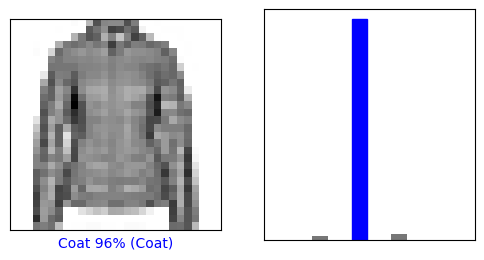

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

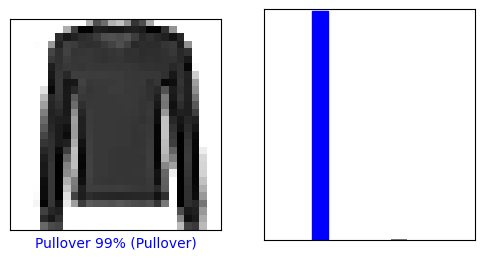

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

- Bu kısım test veri kümesindeki birden fazla resmin modelin tahminlerini ve olasılıklarını görselleştirmek için kullanılır. Bu, modelin performansını genel olarak değerlendirmenize ve tahminlerin doğruluğunu kontrol etmenize yardımcı olabilir.

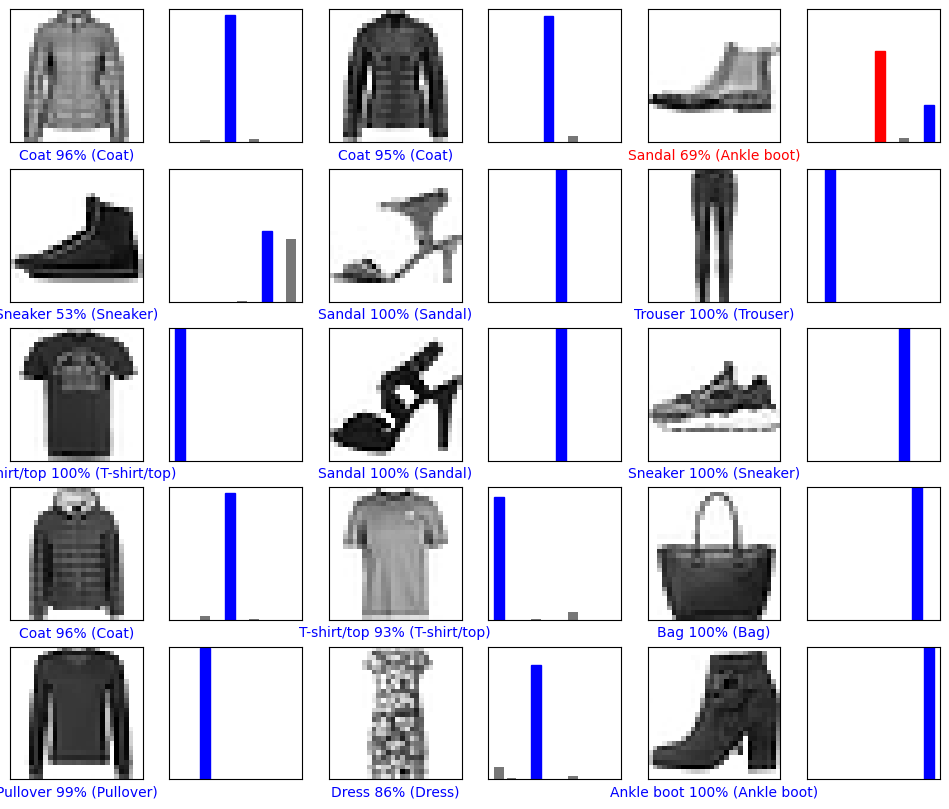

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


- img = test_images[0] ifadesi, test_images dizisinden ilk resmi seçer ve bu resmi img değişkenine kaydeder.Ardından, print(img.shape) ifadesi, resmin şeklini konsola yazdırır.
- Örneğin, eğer resim 28 piksel yüksekliğinde ve 28 piksel genişliğinde bir gri tonlamalı resim ise, çıktı (28, 28, 1) olacaktır. Bu, resmin 28 satır, 28 sütun ve 1 kanala (siyah-beyaz) sahip olduğunu gösterir.

Eğer resim 28 piksel yüksekliğinde, 28 piksel genişliğinde ve 3 kanala (kırmızı, yeşil ve mavi) sahip bir renkli resim ise, çıktı (28, 28, 3) olacaktır.

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


- Bu kod parçacığının çıktısı, dizideki eleman sayısını, resmin yüksekliğini ve genişliğini temsil eden üç tam sayıdan oluşan bir demet olacaktır.

Örneğin, eğer resim 28 piksel yüksekliğinde ve 28 piksel genişliğinde bir gri tonlamalı resim ise, çıktı (1, 28, 28) olacaktır. Bu, NumPy dizisinin 1 elemana sahip olduğunu, bu elemanın da resim olduğunu ve resmin 28 satır ve 28 sütuna sahip olduğunu gösterir. 

Tek bir resmi bir elemana sahip bir NumPy dizisine dönüştürmek, genellikle TensorFlow gibi makine öğrenimi kütüphanelerini kullanırken gerekli olan bir adımdır. Bu kütüphaneler, girdi verilerinin belirli bir formatta olmasını beklerler.

In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Aşağıdaki kod her bir sınıf için modelin tahmin ettiği olasılıkları içeren bir NumPy dizisi olacaktır.

Örneğin, eğer model bir Fashion MNIST sınıflandırıcı ise, çıktı şöyle olabilir:

[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
Use code with caution
Bu, modelin resmin 9. indexteki sınıfa %100 emin olduğunu gösterir.

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 81ms/step
[[4.6206394e-05 2.8754041e-06 1.7196190e-02 3.0914432e-06 9.5746821e-01
  1.4143895e-09 2.5269922e-02 3.3507490e-09 1.3537063e-05 6.6724595e-09]]


- plot_value_array(0, predictions_single, test_labels) ifadesi, modelin img değişkenindeki ilk resim için her sınıf için tahmin ettiği olasılıkları görselleştirmek için plot_value_array fonksiyonunu çağırır. Bu kodun çıktısı, her bir çubuğun bir sınıf için tahmin edilen olasılığı temsil ettiği bir çubuk grafiği olacaktır. Çubuklar, tahminin doğru olup olmadığına bağlı olarak renklendirilecektir.

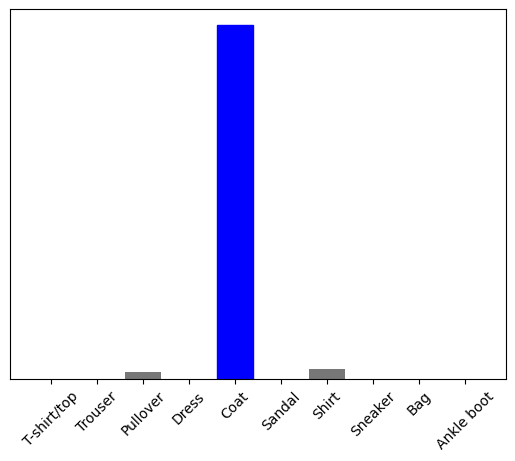

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

- np.argmax(predictions_single[0]) img değişkenindeki ilk resim için en yüksek tahmin edilen olasılığa sahip sınıfın indeksini döndürür.

Bu indeks, resmin tahmin edilen sınıfını belirlemek için kullanılabilir. Örneğin, indeks 3 ise, model ilk resmin bir elbise olduğunu tahmin eder.

In [ ]:
np.argmax(predictions_single[0])

4